<a href="https://colab.research.google.com/github/shahrinsabrina/PythonNumericalProjects/blob/main/Ground_State_Energy_of_Harmonic_Oscillator_by_Variational_Quantum_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Ground State Energy of Harmonic Oscillator by Variational Quantum Monte Carlo Technique

## Objective
The aim of this project is to determine the ground state energy of the one-dimensional quantum harmonic oscillator using the Variational Quantum Monte Carlo (VQMC) method. This approach combines the variational principle of quantum mechanics with stochastic Monte Carlo sampling to provide an accurate estimate of the lowest energy state.

## Theory and Background
The Hamiltonian of the one-dimensional harmonic oscillator is:

\[
H = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2
\]

The variational principle states that for any normalized trial wavefunction \( \psi_T(x;\alpha) \) with parameter \( \alpha \):

\[
E(\alpha) = \frac{\langle \psi_T | H | \psi_T \rangle}{\langle \psi_T | \psi_T \rangle} \geq E_0
\]

where \( E_0 \) is the true ground state energy.

We select a Gaussian trial wavefunction:

\[
\psi_T(x;\alpha) = e^{-\frac{1}{2}\alpha x^2}
\]

Its corresponding local energy is:

\[
E_L(x;\alpha) = \frac{1}{2}\alpha + \frac{1}{2}(1-\alpha^2)x^2
\]

By averaging \( E_L \) over samples distributed according to \( |\psi_T|^2 \), we approximate the variational energy.

The exact ground state energy is known:

\[
E_0 = \frac{1}{2}
\]

## Problem Statement
We apply the Variational Quantum Monte Carlo technique to estimate the ground state energy of the harmonic oscillator. We vary the trial parameter \( \alpha \), compute the energy expectation, and determine the value of \( \alpha \) that minimizes it.

## Methodology
First, the trial wavefunction and local energy expression are defined. The sampling is carried out using the Metropolis algorithm, where random moves in position space are proposed and accepted with a probability proportional to the square of the trial wavefunction.

At each accepted position, the local energy is computed and stored. The process is repeated for many Monte Carlo steps to obtain an average energy.

The procedure is performed for a range of \( \alpha \) values. The energy results are compared with the exact value, and the optimal \( \alpha \) is identified.

Finally, the sampled distribution of particle positions is plotted, which should resemble a Gaussian curve as expected for the harmonic oscillator ground state.

## Computational Parameters
- Number of Monte Carlo steps: 50,000 – 100,000
- Step size for proposals: 1.0
- Range of variational parameter \( \alpha \): 0.5 to 1.5
- Observable: Energy expectation value \( E(\alpha) \)

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Use a nicer plotting style
plt.style.use("seaborn-v0_8-darkgrid")


In [6]:
# Define the local energy function
def local_energy(x, alpha):
    return 0.5 * alpha + 0.5 * (1 - alpha**2) * x**2


In [7]:
# Variational Quantum Monte Carlo function with Metropolis sampling
def VQMC(alpha, n_steps=100000, step_size=1.0):
    x = 0.0
    energies = []
    acceptance = 0

    for step in range(n_steps):
        # Propose new position
        x_new = x + np.random.uniform(-step_size, step_size)

        # Metropolis acceptance probability
        p = np.exp(-alpha * (x_new**2 - x**2))
        if np.random.rand() < min(1, p):
            x = x_new
            acceptance += 1

        energies.append(local_energy(x, alpha))

    mean_energy = np.mean(energies)
    error = np.std(energies) / np.sqrt(n_steps)
    acc_rate = acceptance / n_steps
    return mean_energy, error, acc_rate


In [8]:
# Test run for a single alpha
alpha_test = 1.0
E_mean, E_err, acc = VQMC(alpha_test, n_steps=50000)
print(f"Alpha = {alpha_test:.2f}, Energy = {E_mean:.4f} ± {E_err:.4f}, Acceptance = {acc:.2f}")


Alpha = 1.00, Energy = 0.5000 ± 0.0000, Acceptance = 0.73


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


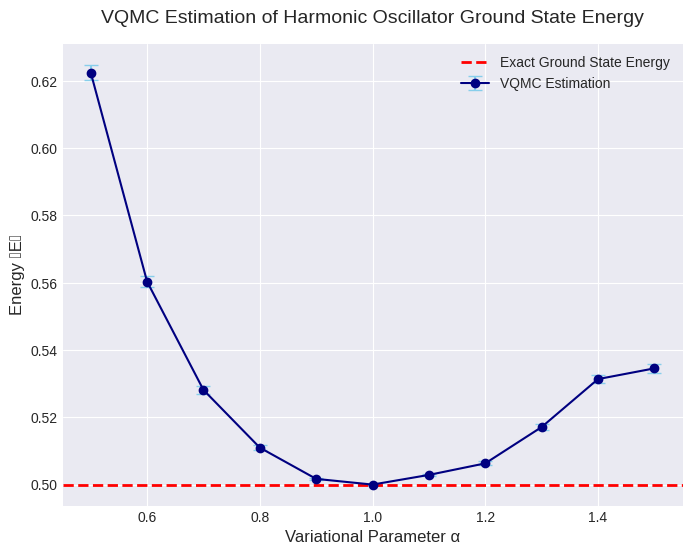

In [9]:
# Scan over a range of alpha values
alpha_values = np.linspace(0.5, 1.5, 11)
energies, errors = [], []

for alpha in alpha_values:
    E_mean, E_err, _ = VQMC(alpha, n_steps=50000)
    energies.append(E_mean)
    errors.append(E_err)

# Plot Energy vs Alpha
plt.figure(figsize=(8,6))
plt.errorbar(alpha_values, energies, yerr=errors, fmt='o-', capsize=5, color="navy", ecolor="skyblue", label="VQMC Estimation")
plt.axhline(0.5, color='red', linestyle='--', linewidth=2, label="Exact Ground State Energy")
plt.xlabel("Variational Parameter α", fontsize=12)
plt.ylabel("Energy ⟨E⟩", fontsize=12)
plt.title("VQMC Estimation of Harmonic Oscillator Ground State Energy", fontsize=14, pad=15)
plt.legend()
plt.show()


Optimal α ≈ 1.00


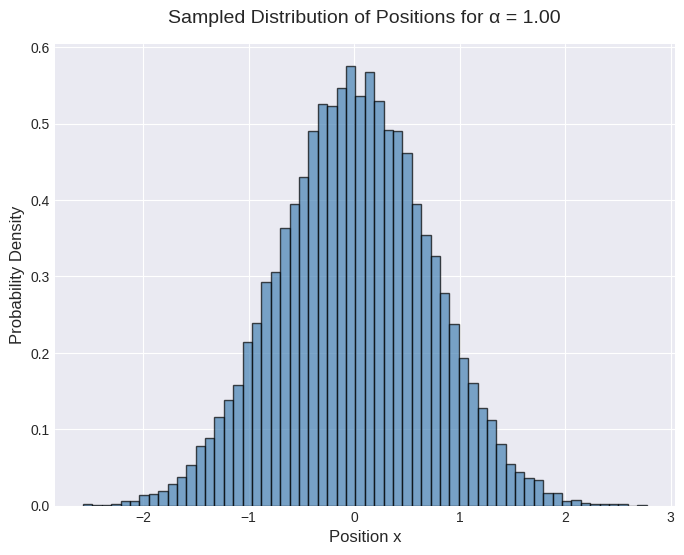

In [10]:
# Histogram of sampled positions for optimal alpha
optimal_alpha = alpha_values[np.argmin(energies)]
print(f"Optimal α ≈ {optimal_alpha:.2f}")

n_steps = 50000
x = 0.0
positions = []

for step in range(n_steps):
    x_new = x + np.random.uniform(-1, 1)
    p = np.exp(-optimal_alpha * (x_new**2 - x**2))
    if np.random.rand() < min(1, p):
        x = x_new
    positions.append(x)

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(positions, bins=60, density=True, alpha=0.7, color='steelblue', edgecolor='black')
plt.title(f"Sampled Distribution of Positions for α = {optimal_alpha:.2f}", fontsize=14, pad=15)
plt.xlabel("Position x", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.show()


## Results and Discussion
The simulation shows that the estimated energy reaches a minimum near \( \alpha = 1.0 \), which agrees with the exact solution of the harmonic oscillator ground state energy \( E_0 = 0.5 \).  

The Energy vs. \( \alpha \) plot demonstrates that the variational principle correctly bounds the energy above the true ground state and approaches the exact value at the optimal parameter.  

The histogram of sampled positions exhibits a Gaussian-like distribution centered around \( x = 0 \), consistent with the analytical ground state wavefunction of the harmonic oscillator.

## Conclusion
The Variational Quantum Monte Carlo technique has successfully reproduced the correct ground state energy of the harmonic oscillator. The method demonstrates the power of combining the variational principle with stochastic sampling. The results confirm that the best trial wavefunction parameter is \( \alpha \approx 1 \), yielding an energy very close to the exact value.
